<a href="https://colab.research.google.com/github/Angel-dash/Crck_pred/blob/main/CrickPred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd


In [3]:
match=pd.read_csv("/content/matches.csv")

In [4]:
match.head()


,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
delivery=pd.read_csv("/content/deliveries.csv")

In [6]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [7]:
match.shape

(756, 18)

In [8]:
delivery.shape

(179078, 21)

In [9]:
total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

<ipython-input-9-40e5f6bc616a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()


In [10]:
total_score_df.shape


(1528, 3)

In [11]:
total_score_df = total_score_df[total_score_df['inning'] == 1]

In [12]:
total_score_df.head()

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157


In [13]:
match_df=match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

Data pre processing

In [14]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [15]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [16]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [17]:
'''match_df['team1']=match_df['team1'].str.replace('Sunrisers Hyderabad','Deccan Chargers')
match_df['team2']=match_df['team2'].str.replace('Sunrisers Hyderabad','Deccan Chargers')'''

"match_df['team1']=match_df['team1'].str.replace('Sunrisers Hyderabad','Deccan Chargers')\nmatch_df['team2']=match_df['team2'].str.replace('Sunrisers Hyderabad','Deccan Chargers')"

In [18]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [19]:
match_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,178
7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,8,148
9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,10,158


In [20]:
match_df.shape

(641, 20)

In [21]:
match_df['dl_applied'].value_counts()

0    626
1     15
Name: dl_applied, dtype: int64

In [22]:
match_df=match_df[match_df['dl_applied']==0]

In [23]:
match_df.shape

(626, 20)

In [24]:
match_df=match_df[['match_id','city','winner','total_runs']]

In [25]:
delivery_df=match_df.merge(delivery,on='match_id')

In [26]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [27]:
delivery_df = delivery_df[delivery_df['inning']==2]


In [28]:
delivery_df.shape

(72413, 24)

In [29]:
delivery_df['current_score']=delivery_df.groupby('match_id').cumsum()['total_runs_y']

<ipython-input-29-eb2e5567854c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  delivery_df['current_score']=delivery_df.groupby('match_id').cumsum()['total_runs_y']
<ipython-input-29-eb2e5567854c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['current_score']=delivery_df.groupby('match_id').cumsum()['total_runs_y']


In [30]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,1,0,1,NaN,NaN,NaN,1
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,2,0,2,NaN,NaN,NaN,3
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,4,0,4,NaN,NaN,NaN,7


In [31]:
delivery_df['runs_required']=delivery_df['total_runs_x']-delivery_df['current_score']+1

<ipython-input-31-b667e98b6900>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['runs_required']=delivery_df['total_runs_x']-delivery_df['current_score']+1


In [32]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_required
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,1,0,1,NaN,NaN,NaN,1,207
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,207
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,207
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,2,0,2,NaN,NaN,NaN,3,205
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,4,0,4,NaN,NaN,NaN,7,201


In [33]:
#calculating the remaining balls
delivery_df['balls_left']=126-(delivery_df['over']*6+delivery_df['ball'])

<ipython-input-33-e2c13758a991>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['balls_left']=126-(delivery_df['over']*6+delivery_df['ball'])


In [34]:
delivery_df['player_dismissed']=delivery_df['player_dismissed'].fillna('0')

<ipython-input-34-98b06876bae9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['player_dismissed']=delivery_df['player_dismissed'].fillna('0')


In [35]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_required,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,0,NaN,NaN,1,207,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,1,207,118
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,1,207,117
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,0,NaN,NaN,3,205,116
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,0,NaN,NaN,7,201,115


In [36]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')

In [37]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_required,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,0,NaN,NaN,1,207,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,1,207,118
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,1,207,117
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,0,NaN,NaN,3,205,116
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,0,NaN,NaN,7,201,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,1,0,NaN,NaN,152,1,4
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,2,0,NaN,NaN,154,-1,3
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,0,1,1,run out,KH Pandya,155,-2,2
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,2,0,NaN,NaN,157,-4,1


In [38]:
wickets=delivery_df.groupby('match_id').cumsum()['player_dismissed'].values
delivery_df['wickets'] = 10 - wickets

<ipython-input-38-17d64a07184f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  wickets=delivery_df.groupby('match_id').cumsum()['player_dismissed'].values


In [39]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_required,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,207,119,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,207,118,10
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,207,117,10
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,205,116,10
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,201,115,10


In [40]:
delivery_df.tail()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_required,balls_left,wickets
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,1,0,1,0,NaN,NaN,152,1,4,5
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,2,0,2,0,NaN,NaN,154,-1,3,5
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,0,1,1,run out,KH Pandya,155,-2,2,4
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,2,0,2,0,NaN,NaN,157,-4,1,4
149577,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,...,0,0,0,1,lbw,NaN,157,-4,0,3


In [41]:
#calculating crr
delivery_df['Crr']=6*delivery_df['current_score']/(120-delivery_df['balls_left'])

In [42]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_required,balls_left,wickets,Crr
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,NaN,NaN,1,207,119,10,6.0
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,NaN,NaN,1,207,118,10,3.0
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,NaN,NaN,1,207,117,10,2.0
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,NaN,NaN,3,205,116,10,4.5
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,NaN,NaN,7,201,115,10,8.4


In [43]:
#calculating rrr

delivery_df['rrr'] = (delivery_df['runs_required']*6)/delivery_df['balls_left']

In [44]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_required,balls_left,wickets,Crr,rrr
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,NaN,NaN,1,207,119,10,6.0,10.436975
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,NaN,NaN,1,207,118,10,3.0,10.525424
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,NaN,NaN,1,207,117,10,2.0,10.615385
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,NaN,NaN,3,205,116,10,4.5,10.603448
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,NaN,NaN,7,201,115,10,8.4,10.486957


In [45]:
def result(row):
  return 1 if row['batting_team']==row['winner'] else 0

In [46]:
delivery_df['results']=delivery_df.apply(result,axis=1)

In [47]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_score,runs_required,balls_left,wickets,Crr,rrr,results
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,NaN,NaN,1,207,119,10,6.0,10.436975,0
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,NaN,NaN,1,207,118,10,3.0,10.525424,0
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,NaN,NaN,1,207,117,10,2.0,10.615385,0
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,NaN,NaN,3,205,116,10,4.5,10.603448,0
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,NaN,NaN,7,201,115,10,8.4,10.486957,0


In [48]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_required','balls_left','wickets','total_runs_x','Crr','rrr','results']]

In [49]:
final_df.shape

(72413, 10)

In [50]:
final_df.head()

,batting_team,bowling_team,city,runs_required,balls_left,wickets,total_runs_x,Crr,rrr,results
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,119,10,207,6.0,10.436975,0
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,118,10,207,3.0,10.525424,0
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,117,10,207,2.0,10.615385,0
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,205,116,10,207,4.5,10.603448,0
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,201,115,10,207,8.4,10.486957,0


In [51]:
final_df = final_df.sample(final_df.shape[0])#suffle the first row so that the dataset doesnot show bias

In [52]:
final_df.head()

,batting_team,bowling_team,city,runs_required,balls_left,wickets,total_runs_x,Crr,rrr,results
104094,Sunrisers Hyderabad,Delhi Daredevils,Visakhapatnam,113,73,8,167,7.021277,9.287671,0
91262,Mumbai Indians,Sunrisers Hyderabad,NaN,139,80,7,172,5.100000,10.425000,0
13558,Chennai Super Kings,Delhi Daredevils,Delhi,151,93,10,187,8.222222,9.741935,1
26187,Deccan Chargers,Chennai Super Kings,East London,172,101,7,178,2.210526,10.217822,0
50555,Kolkata Knight Riders,Rajasthan Royals,Kolkata,80,114,9,81,2.000000,4.210526,1


Model training

In [53]:
final_df.isnull().sum()

batting_team       0
bowling_team       0
city             832
runs_required      0
balls_left         0
wickets            0
total_runs_x       0
Crr                0
rrr                5
results            0
dtype: int64

In [54]:
final_df.dropna(inplace=True)
final_df.shape

(71576, 10)

In [55]:
final_df.describe()

,runs_required,balls_left,wickets,total_runs_x,Crr,rrr,results
count,71576.000000,71576.000000,71576.000000,71576.000000,71576.000000,7.157600e+04,71576.000000
mean,93.383313,62.673159,7.537904,165.767841,7.449324,NaN,0.525246
std,50.058881,33.398497,2.139570,29.291819,2.277979,NaN,0.499366
min,-15.000000,-2.000000,0.000000,65.000000,0.000000,-inf,0.000000
25%,54.000000,35.000000,6.000000,147.000000,6.272727,7.272727e+00,0.000000
50%,93.000000,63.000000,8.000000,165.000000,7.500000,9.000000e+00,1.000000
75%,131.000000,92.000000,9.000000,185.000000,8.696629,1.106422e+01,1.000000
max,250.000000,119.000000,10.000000,250.000000,42.000000,inf,1.000000


In [56]:
final_df = final_df[final_df['balls_left'] != 0]
final_df.shape

(71342, 10)

In [57]:
final_df[final_df['balls_left']==0]

,batting_team,bowling_team,city,runs_required,balls_left,wickets,total_runs_x,Crr,rrr,results


In [58]:
final_df.describe()

,runs_required,balls_left,wickets,total_runs_x,Crr,rrr,results
count,71342.000000,71342.000000,71342.000000,71342.000000,71342.000000,71342.000000,71342.000000
mean,93.621065,62.878725,7.553251,165.726963,7.447791,10.568474,0.526646
std,49.957572,33.259471,2.124334,29.294967,2.280498,14.041845,0.499293
min,-15.000000,-2.000000,0.000000,65.000000,0.000000,-516.000000,0.000000
25%,54.000000,35.000000,6.000000,147.000000,6.265782,7.267606,0.000000
50%,93.000000,64.000000,8.000000,165.000000,7.500000,9.000000,1.000000
75%,131.000000,92.000000,9.000000,185.000000,8.696385,11.032258,1.000000
max,250.000000,119.000000,10.000000,250.000000,42.000000,684.000000,1.000000


In [59]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]#all the row and the last column

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [61]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse_output=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [63]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [64]:
pipe.fit(X_train,y_train)


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [65]:
X_train['balls_left'].isnull().sum()

0

In [66]:
X_train.describe()

,runs_required,balls_left,wickets,total_runs_x,Crr,rrr
count,57073.000000,57073.000000,57073.000000,57073.000000,57073.000000,57073.000000
mean,93.545950,62.875650,7.557006,165.646996,7.448896,10.596533
std,50.016172,33.267129,2.124221,29.358740,2.273396,14.050977
min,-15.000000,-2.000000,0.000000,65.000000,0.000000,-516.000000
25%,54.000000,35.000000,6.000000,147.000000,6.268657,7.255814
50%,93.000000,64.000000,8.000000,165.000000,7.500000,9.000000
75%,131.000000,92.000000,9.000000,185.000000,8.700000,11.027027
max,250.000000,119.000000,10.000000,250.000000,36.000000,684.000000


In [67]:
y_pred=pipe.predict(X_test)

In [68]:
from sklearn.metrics import accuracy_score


In [69]:
accuracy_score(y_test,y_pred)

0.802579017450417

In [70]:
y_pred1=pipe.predict(X_train)
accuracy_score(y_train,y_pred1)

0.8036024039388152

In [71]:
#using random forest as pipe2
pipe2 = Pipeline(steps=[
    ('step1',trf),
    ('step2',RandomForestClassifier())
])

In [72]:
pipe2.fit(X_train,y_train)


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', RandomForestClassifier())])

In [73]:
y_predict_test=pipe2.predict(X_test)

In [74]:
y_predict_train=pipe2.predict(X_train)

In [75]:
print(f"The test accuracy of random forest is {accuracy_score(y_predict_test,y_test)}")
print(f"The train accuracy of random forest is {accuracy_score(y_predict_train,y_train)}")

The test accuracy of random forest is 0.9989487700609714
The train accuracy of random forest is 0.9999649571601282


In [76]:
pipe2.predict_proba(X_test)[0]

array([0.82, 0.18])

In [77]:
for i in range(50):
  result=pipe2.predict_proba(X_test)[i]
  print(f"The result of {i}th game  is {result}")

The result of 0th game  is [0.82 0.18]
The result of 1th game  is [1. 0.]
The result of 2th game  is [0.98 0.02]
The result of 3th game  is [0.99 0.01]
The result of 4th game  is [0. 1.]
The result of 5th game  is [0.93 0.07]
The result of 6th game  is [0.91 0.09]
The result of 7th game  is [1. 0.]
The result of 8th game  is [0.94 0.06]
The result of 9th game  is [0.01 0.99]
The result of 10th game  is [0.99 0.01]
The result of 11th game  is [0.99 0.01]
The result of 12th game  is [0.09 0.91]
The result of 13th game  is [0. 1.]
The result of 14th game  is [0.14 0.86]
The result of 15th game  is [1. 0.]
The result of 16th game  is [1. 0.]
The result of 17th game  is [0.99 0.01]
The result of 18th game  is [0. 1.]
The result of 19th game  is [0. 1.]
The result of 20th game  is [0. 1.]
The result of 21th game  is [0.01 0.99]
The result of 22th game  is [1. 0.]
The result of 23th game  is [0. 1.]
The result of 24th game  is [0.99 0.01]
The result of 25th game  is [0.02 0.98]
The result of 

In [82]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_required','balls_left','wickets','total_runs_x','Crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)

    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_required'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]

    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [84]:
temp_df,target = match_progression(delivery_df,74,pipe)
temp_df


Target- 178


,end_of_over,runs_after_over,wickets_in_over,lose,win
10459,1,3,0,55.7,44.3
10467,2,8,0,50.5,49.5
10473,3,1,0,57.3,42.7
10479,4,7,1,68.9,31.1
10485,5,12,0,58.8,41.2
10491,6,13,0,46.4,53.6
10497,7,9,0,40.5,59.5
10505,8,15,0,26.7,73.3
10511,9,7,0,24.6,75.4
10518,10,17,0,13.3,86.7


In [85]:
temp_df1,target = match_progression(delivery_df,74,pipe2)
temp_df1


Target- 178


,end_of_over,runs_after_over,wickets_in_over,lose,win
10459,1,3,0,95.0,5.0
10467,2,8,0,99.0,1.0
10473,3,1,0,95.0,5.0
10479,4,7,1,99.0,1.0
10485,5,12,0,98.0,2.0
10491,6,13,0,97.0,3.0
10497,7,9,0,93.0,7.0
10505,8,15,0,100.0,0.0
10511,9,7,0,96.0,4.0
10518,10,17,0,97.0,3.0


Text(0.5, 1.0, 'Target-178')

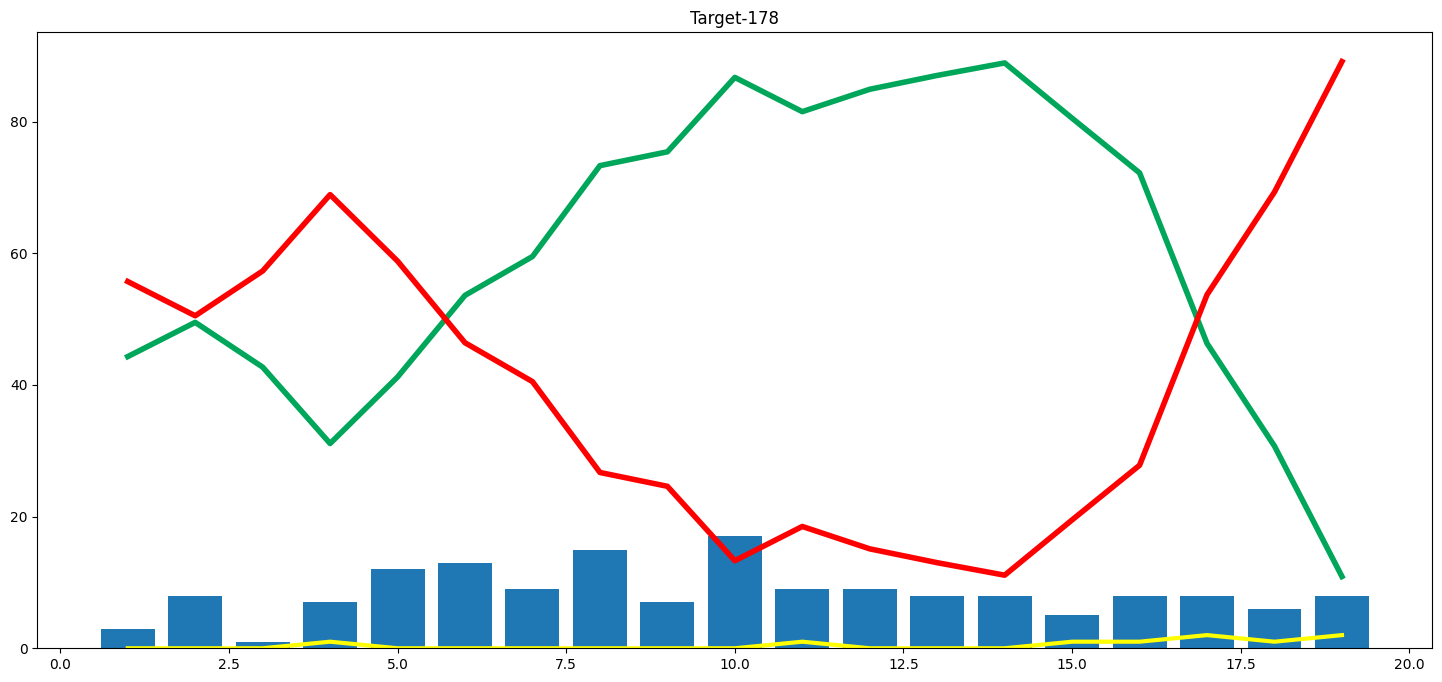

In [86]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

Text(0.5, 1.0, 'Target-178')

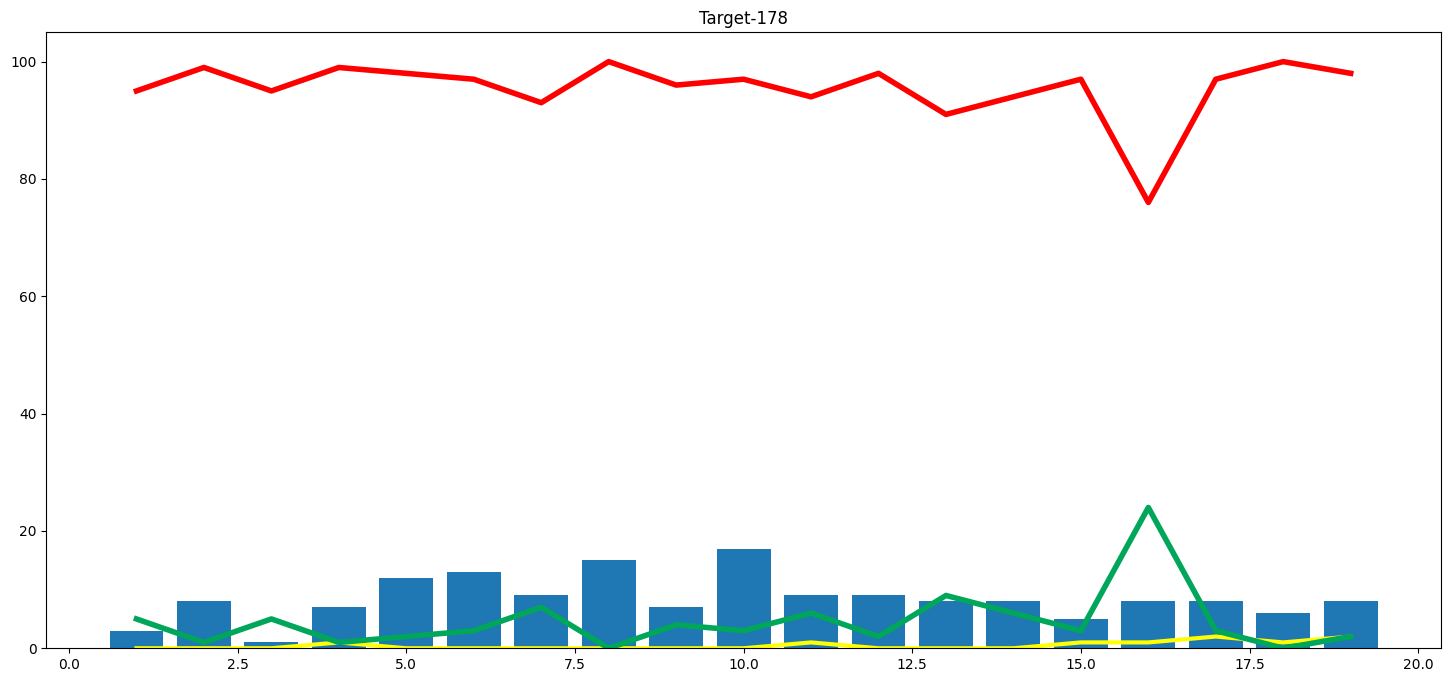

In [87]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df1['end_of_over'],temp_df1['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df1['end_of_over'],temp_df1['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df1['end_of_over'],temp_df1['lose'],color='red',linewidth=4)
plt.bar(temp_df1['end_of_over'],temp_df1['runs_after_over'])
plt.title('Target-' + str(target))